Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 3)
Team shape: (155541, 33)
Opponent shape: (155541, 33)
Total shape: (88002, 71)

=== DataFrame Overview ===
Shape: (88002, 71)

Columns:
['Time', 'half', 'Ball_x', 'Ball_y', 'game', 'FCKplayer_0_x', 'FCKplayer_0_y', 'FCKplayer_0_number', 'FCKplayer_1_x', 'FCKplayer_1_y', 'FCKplayer_1_number', 'FCKplayer_2_x', 'FCKplayer_2_y', 'FCKplayer_2_number', 'FCKplayer_3_x', 'FCKplayer_3_y', 'FCKplayer_3_number', 'FCKplayer_4_x', 'FCKplayer_4_y', 'FCKplayer_4_number', 'FCKplayer_5_x', 'FCKplayer_5_y', 'FCKplayer_5_number', 'FCKplayer_6_x', 'FCKplayer_6_y', 'FCKplayer_6_number', 'FCKplayer_7_x', 'FCKplayer_7_y', 'FCKplayer_7_number', 'FCKplayer_8_x', 'FCKplayer_8_y', 'FCKplayer_8_number', 'FCKplayer_9_x', 'FCKplayer_9_y', 'FCKplayer_9_number', 'FCKplayer_10_x', 'FCKplayer_10_y', 'FCKplayer_10_number', 'RFCplayer_0_x', 'RFCplayer_0_y

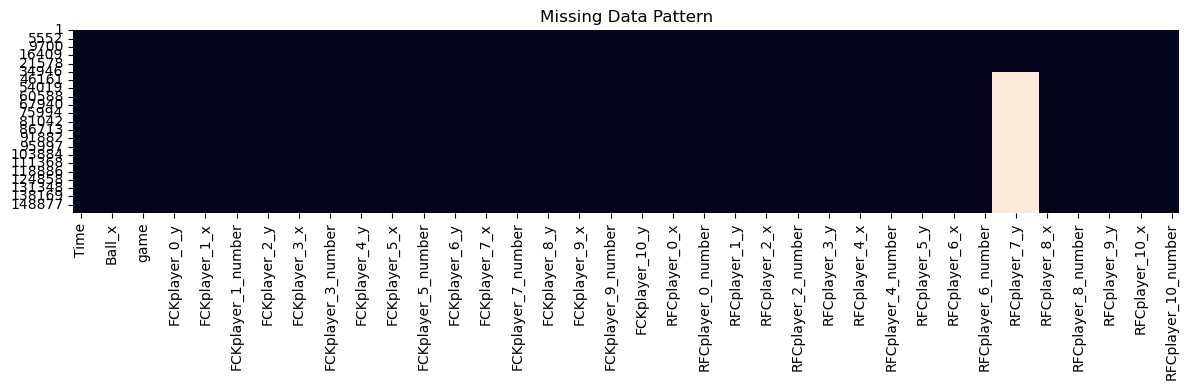

In [2]:
#Gonna try to make a NN which accounts for all players + ball position
#Importing libraries
from data_loader import FootballDataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU


In [3]:
#Preparing training and testing data
data_dir = r"\Users\kirlo\Documents\Sanvi University Work\Year 3\AML\final project\FootballData\RestructuredData_2425"  # replace with your actual data directory
team = "FCK"         
data_retriever = FootballDataLoader(data_dir, team)
all_games = data_retriever.load_all_games(n_games= 1)
game = all_games[0]
#I wanted to train off one game and test on another but due to the different teams playing, I havent successfully reduced
#the data into a format that works for the model. Right now i have just train_test split the data into 80% train and 20% test

Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 6)
Team shape: (155541, 55)
Opponent shape: (155541, 55)
Total shape: (88002, 118)


In [4]:
#reducing data to relevant columns
position_columns = [
    col for col in game.columns 
    if (
        ('player' in col and (col.endswith('_x') or col.endswith('_y'))) or 
        ('ball' in col.lower() and (col.endswith('_x') or col.endswith('_y') or 'speed' in col.lower()))
    )
]

game_reduced = game[position_columns]

In [5]:
#reshaping data so its compatible with GRU
position_columns = [col for col in game_reduced.columns if col != 'Time']
positions = game_reduced[position_columns].values

n_steps = 10
X = []
y = []

for i in range(len(positions) - n_steps):
    X.append(positions[i:i + n_steps])
    y.append(positions[i + n_steps])
X = np.array(X)
y = np.array(y)




In [6]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(n_steps, len(position_columns)), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(position_columns)))
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

c:\Users\kirlo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - loss: nan - val_loss: nan
Epoch 2/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: nan - val_loss: nan
Epoch 3/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - loss: nan - val_loss: nan
Epoch 4/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - loss: nan - val_loss: nan
Epoch 5/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - loss: nan - val_loss: nan
Epoch 6/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - loss: nan - val_loss: nan
Epoch 7/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - loss: nan - val_loss: nan
Epoch 8/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - loss: nan - val_loss: nan
Epoch 9/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - loss: nan - val_loss: nan
Epoch 10/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - loss: nan - val_loss: nan


550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: nan
Test Loss: nan
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


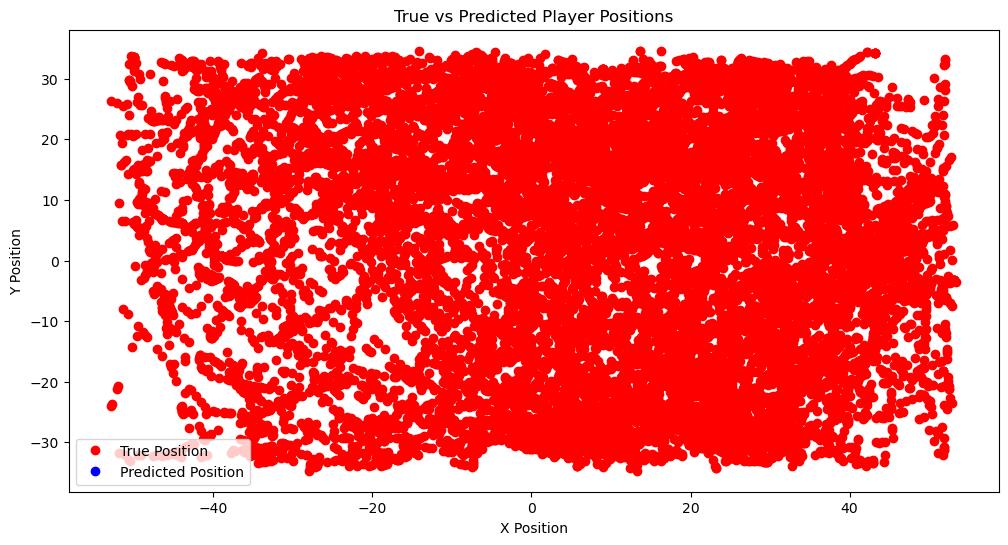

In [7]:
#Validating the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
#Making predictions
predictions = model.predict(X_test)
#Reshaping predictions to match the original data structure
predictions = predictions.reshape(predictions.shape[0], -1)
#Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], y_test[:, 1], 'ro', label='True Position')
plt.plot(predictions[:, 0], predictions[:, 1], 'bo', label='Predicted Position')
plt.title('True vs Predicted Player Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.show()
